In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<h1 style="font-size:30px;">Loading the data</h1>

In [2]:
#generating the data:
x = np.linspace(0, 50, 501)
y = np.sin(x)

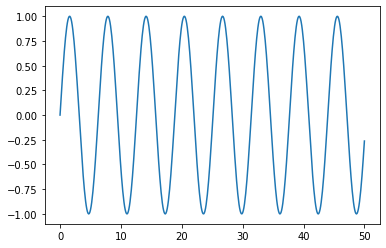

In [3]:
plt.plot(x, y)

In [4]:
#convert to data frame, just a bit easier to work with:
df = pd.DataFrame(data = y, index = x, columns = ['sine'])

In [5]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400



<h1 style="font-size:30px;">train-test Split</h1>

In [6]:
#the process of train test split is different from ANN and CNN in which we used Skleran's train_test_split.
test_percent = 0.1
test_point = np.round(int(len(df)*test_percent))
test_index = int(len(df) - test_point)
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [7]:
# train
test.shape

(50, 1)


<h1 style="font-size:30px;">Scaling</h1>

In [8]:
#Scaling in RNN is different than ANN and CNN.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [10]:
test_scaled

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],



<h1 style="font-size:30px;">Making batches</h1>

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
#just for demooooooo: the actual generator is some lines below.
length = 25
batch_size = 1 #batch_size = 1 is a good amount.

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size) 

In [13]:
x, y = generator[0]

In [14]:
len(train_scaled)

451

In [15]:
len(generator) #len(generator) = len(train_scaled) - length

426

In [16]:
x

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [17]:
y

array([[0.79923759]])

In [19]:
#so basically, we should have (at least) one peak of the sine wave to be able to predict the next points. so we choose length = 50.
#so generator[i] has (length + 1)scaled points.

In [20]:
length = 50
batch_size = 1 #batch_size = 1 is a good amount.

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size) 


<h1 style="font-size:30px;">Training the Model</h1>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, LSTM

In [34]:
n_features = 1 #number od features = (only x) = 1

In [35]:
model = Sequential()

model.add(SimpleRNN(units=50, input_shape=(length, n_features))) 
model.add(Dense(units=1)) #output layer

model.compile(optimizer = 'adam', loss = 'mse') #loss = 'mse': since we are working with continuous values

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit_generator(generator, epochs =5) #.fit_generator(): since we are working with the generators

Epoch 1/5
401/401 [==============================] - 28s 71ms/step - loss: 0.0046
Epoch 2/5
401/401 [==============================] - 29s 73ms/step - loss: 1.1399e-04
Epoch 3/5
401/401 [==============================] - 25s 62ms/step - loss: 3.4333e-04
Epoch 4/5
401/401 [==============================] - 28s 70ms/step - loss: 9.4026e-06
Epoch 5/5
401/401 [==============================] - 27s 67ms/step - loss: 4.6313e-04


In [39]:
losses = pd.DataFrame(model.history.history)

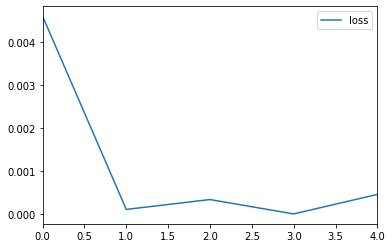

In [41]:
losses.plot()


<h1 style="font-size:30px;">predicting a single result</h1>

In [43]:
first_eval_batch = train_scaled[-length:] #the last length ta! = one period of the sine wave

In [45]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [46]:
first_eval_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [47]:
model.predict(first_eval_batch)

array([[0.94872695]], dtype=float32)

In [48]:
test_scaled[0]

array([0.94955134])

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [55]:
# current_batch

In [54]:
# predicted_value = [[[99]]]
# np.append(current_batch[:, 1:, :], predicted_value, axis = 1) #as we can see bellow, the first element of current_batch is deleted, and predicted_value is also appended.

In [57]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [58]:
test_predictions

[array([0.94872695], dtype=float32),
 array([0.96648985], dtype=float32),
 array([0.9790098], dtype=float32),
 array([0.98630357], dtype=float32),
 array([0.9883744], dtype=float32),
 array([0.9851221], dtype=float32),
 array([0.9767696], dtype=float32),
 array([0.9635165], dtype=float32),
 array([0.94553584], dtype=float32),
 array([0.9231751], dtype=float32),
 array([0.89661103], dtype=float32),
 array([0.8661267], dtype=float32),
 array([0.83195287], dtype=float32),
 array([0.7944781], dtype=float32),
 array([0.7540722], dtype=float32),
 array([0.710942], dtype=float32),
 array([0.6654201], dtype=float32),
 array([0.6178084], dtype=float32),
 array([0.56861734], dtype=float32),
 array([0.5183042], dtype=float32),
 array([0.46729097], dtype=float32),
 array([0.41605103], dtype=float32),
 array([0.36497316], dtype=float32),
 array([0.31467095], dtype=float32),
 array([0.2656891], dtype=float32),
 array([0.21867849], dtype=float32),
 array([0.17424722], dtype=float32),
 array([0.132861

In [59]:
test_scaled

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions

array([[ 0.89744847],
       [ 0.93297398],
       [ 0.95801369],
       [ 0.9726011 ],
       [ 0.97674275],
       [ 0.97023815],
       [ 0.95353337],
       [ 0.92702728],
       [ 0.89106629],
       [ 0.84634517],
       [ 0.79321747],
       [ 0.73224932],
       [ 0.66390218],
       [ 0.58895328],
       [ 0.50814207],
       [ 0.42188232],
       [ 0.33083934],
       [ 0.23561668],
       [ 0.13723535],
       [ 0.03660993],
       [-0.06541577],
       [-0.16789482],
       [-0.27004975],
       [-0.37065336],
       [-0.46861626],
       [-0.56263674],
       [-0.65149856],
       [-0.73426965],
       [-0.80966638],
       [-0.87670976],
       [-0.93427319],
       [-0.98150969],
       [-1.01779975],
       [-1.04255754],
       [-1.05551184],
       [-1.05611031],
       [-1.04451262],
       [-1.02104964],
       [-0.98622926],
       [-0.94088566],
       [-0.8855452 ],
       [-0.82126699],
       [-0.74874786],
       [-0.66914259],
       [-0.58375518],
       [-0

In [63]:
# test
test['predictions'] = true_predictions

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
test

,sine,predictions
45.1,0.899097,0.897448
45.2,0.938307,0.932974
45.3,0.968142,0.958014
45.4,0.988304,0.972601
45.5,0.998591,0.976743
45.6,0.998900,0.970238
45.7,0.989229,0.953533
45.8,0.969673,0.927027
45.9,0.940429,0.891066
46.0,0.901788,0.846345


<Figure size 864x576 with 0 Axes>

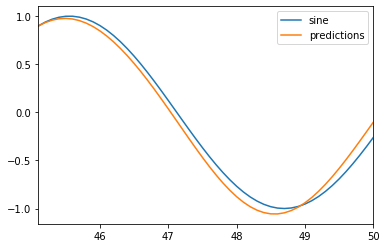

In [66]:
plt.figure(figsize = (12, 8))
test.plot() #or: test.plt(figsize = (12, 8))


<h1 style="font-size:30px;">LSTM</h1>

In [68]:
#early stopping:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [72]:
length = 49

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size=1) # = generator

validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size=1)

In [76]:
train_generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [77]:
model = Sequential()

model.add(LSTM(units=50, input_shape=(length, n_features))) 
model.add(Dense(units=1)) #output layer

model.compile(optimizer = 'adam', loss = 'mse') #loss = 'mse': since we are working with continuous values

In [79]:
model.fit_generator(train_generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/20
402/402 [==============================] - 72s 180ms/step - loss: 0.0205 - val_loss: 5.9060e-05
Epoch 2/20
402/402 [==============================] - 49s 122ms/step - loss: 4.6957e-05 - val_loss: 5.5701e-05
Epoch 3/20
402/402 [==============================] - 54s 134ms/step - loss: 7.1984e-05 - val_loss: 5.4552e-07
Epoch 4/20
402/402 [==============================] - 54s 134ms/step - loss: 5.4067e-05 - val_loss: 1.6541e-07
Epoch 5/20
402/402 [==============================] - 74s 183ms/step - loss: 5.7542e-05 - val_loss: 3.9668e-05
Epoch 6/20
402/402 [==============================] - 56s 138ms/step - loss: 3.9013e-04 - val_loss: 9.2476e-05


In [80]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [81]:
true_predictions = scaler.inverse_transform(test_predictions)

In [82]:
# test
test['LSTM_predictions'] = true_predictions

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


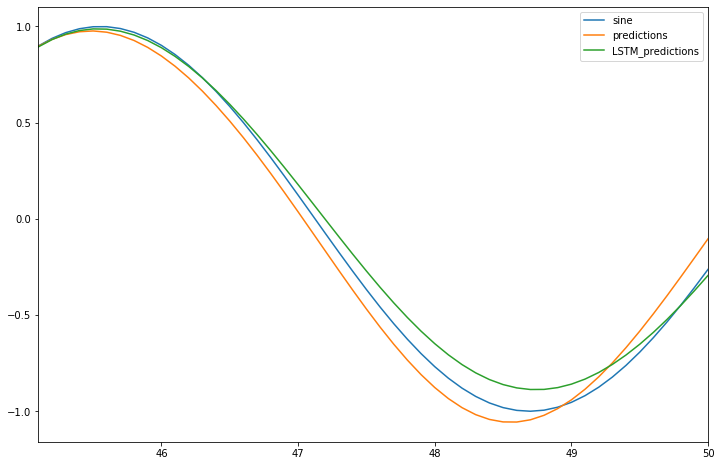

In [83]:
test.plot(figsize = (12, 8))


<h1 style="font-size:30px;">Forcasting beyond the 50 points in the sine wave</h1>

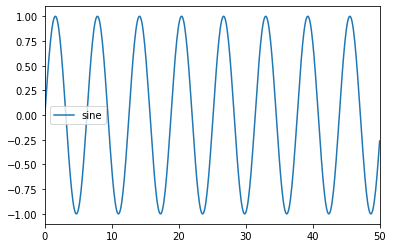

In [84]:
df.plot()

In [85]:
#scaling the data frame:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [86]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [89]:
model = Sequential()

model.add(LSTM(units=50, input_shape=(length, n_features))) 
model.add(Dense(units=1)) #output layer

model.compile(optimizer = 'adam', loss = 'mse') #loss = 'mse': since we are working with continuous values

In [90]:
model.fit_generator(generator, epochs = 6)

Epoch 1/6
452/452 [==============================] - 55s 121ms/step - loss: 0.0106
Epoch 2/6
452/452 [==============================] - 56s 124ms/step - loss: 9.0753e-05
Epoch 3/6
452/452 [==============================] - 61s 134ms/step - loss: 1.9974e-04
Epoch 4/6
452/452 [==============================] - 76s 167ms/step - loss: 5.8715e-05
Epoch 5/6
452/452 [==============================] - 60s 133ms/step - loss: 2.2967e-04
Epoch 6/6
452/452 [==============================] - 52s 116ms/step - loss: 9.1219e-05


In [91]:
forcast = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    
    current_pred = model.predict(current_batch)[0]
    forcast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [92]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
forcast = scaler.inverse_transform(forcast)

In [95]:
#adding forcast to the end of our df:

forcast_index = np.arange(50.1, 52.6, step = 0.1) #start_point = after 50.0 = 50.1   #end_point = start_point + 25 forcasting points*step = start_point + 25*0.1 = 52.6

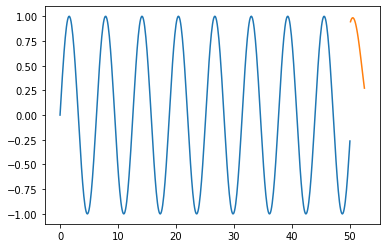

In [101]:
plt.plot(df.index, df['sine'])
plt.plot(forcast_index, forcast) #plots on the former plt.plot
# we could also use 'concatenate' so that these two plots are in the same color, and actually one shape.